In [1]:
%matplotlib inline

import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import beta
from matplotlib import cm
from mpl_toolkits import mplot3d

$p(\theta, \omega) = p(\theta|\omega)p(\omega)$

$p(D|\theta, \omega) = \theta^{z}(1 - \theta)^{n-z}$

$p(\theta, \omega | D))$ is obtaining by multiplying each cell of the prior times each the corresponding cell in the likelihood grid and then normalising

In [2]:
def calculate_pdfs(paremeters, granularity = 100):
    theta = np.linspace(0, 1, granularity)
    omega = np.linspace(0, 1, granularity)
    width_t = theta[1]
    width_w = omega[1]
    THETA, OMEGA = np.meshgrid(theta, omega)
    prior = np.multiply(beta.pdf(THETA, 
                                 OMEGA * (parameters['k'] - 2) + 1, 
                                 (1 - OMEGA) * (parameters['k'] - 2) + 1), 
                        beta.pdf(OMEGA, parameters['a_w'], parameters['b_w']))
    prior = prior / (np.sum(np.sum(prior)) * width_t * width_w)
    likelihood = np.multiply(np.power(THETA, parameters['z']), np.power(1 - THETA, parameters['n'] - parameters['z']))
    posterior = np.multiply(prior, likelihood) 
    posterior = posterior / (np.sum(np.sum(posterior)) * width_t * width_w)
    
    return theta, omega, prior, likelihood, posterior

In [3]:
def plot_prior_posterior(pdf, theta, omega, parameters = None):
    width_t = theta[1]
    THETA, OMEGA = np.meshgrid(theta, omega)
    marginal_theta = np.sum(pdf, axis = 1) / pdf.shape[0]
    marginal_omega = np.sum(pdf, axis = 0) / pdf.shape[1]
    marginal_theta_w_075 = pdf[:, 75] / (np.sum(pdf[:, 75]) * width_t)
    marginal_theta_w_025 = pdf[:, 25] / (np.sum(pdf[:, 25]) * width_t)
    
    fig = plt.figure(constrained_layout = False)
    gs = fig.add_gridspec(4, 3)
    ax1 = fig.add_subplot(gs[0:2, 0], projection='3d')
    ax1.plot_surface(THETA, OMEGA, pdf, cmap = cm.coolwarm, edgecolor = 'none')
    ax1.view_init(30, 250)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_zticks([])
    ax1.xaxis.labelpad = -15
    ax1.yaxis.labelpad = -15
    ax1.zaxis.labelpad = -15
    ax1.set_xlabel('theta')
    ax1.set_ylabel('omega')
    ax1.set_zlabel('prior')

    ax2 = fig.add_subplot(gs[0:2, 1])
    ax2.contourf(THETA, OMEGA, pdf, cmap = cm.coolwarm)
    ax2.set_xlabel(r'$\theta$')
    ax2.set_ylabel(r'$\omega$')

    ax3 = fig.add_subplot(gs[0:2, 2])
    ax3.plot(marginal_omega, omega)
    ax3.set_xlabel(r'Marginal $p(\omega)$')
    ax3.set_ylabel(r'$\omega$')

    ax4 = fig.add_subplot(gs[2:4, 0])
    ax4.axis('off')
    if parameters is not None:
        parameters_str = '$A_{\omega}$ = ' + \
                         str(parameters['a_w']) + \
                         ', $B_{\omega}$ = ' + \
                         str(parameters['b_w']) + \
                         '\nK = ' + \
                         str(parameters['k'])
        ax4.text(1.1, 0.65, 'Prior', transform = ax4.transAxes, fontsize = 18, horizontalalignment = 'right')
        ax4.text(1.1, 0.4, parameters_str, transform = ax4.transAxes, fontsize = 12, horizontalalignment = 'right')
    else:
        ax4.text(1.1, 0.65, 'Posterior', transform = ax4.transAxes, fontsize = 18, horizontalalignment = 'right')

    ax5 = fig.add_subplot(gs[2:4, 1])
    ax5.plot(theta, marginal_theta)
    ax5.set_xlabel(r'$\theta$')
    ax5.set_ylabel(r'Marginal $p(\theta)$')

    ax6 = fig.add_subplot(gs[2, 2])
    ax6.plot(theta, marginal_theta_w_075)
    ax6.set_xlabel(r'$\theta$')
    ax6.set_ylabel(r'$p(\theta|\omega=.75)$')

    ax7 = fig.add_subplot(gs[3, 2])
    ax7.plot(theta, marginal_theta_w_025)
    ax7.set_xlabel(r'$\theta$')
    ax7.set_ylabel(r'$p(\theta|\omega=.25)$')

    fig.set_figwidth(8)
    fig.set_figheight(5)
    plt.tight_layout()
    
    return [ax1, ax2, ax3, ax4, ax5, ax6, ax7]

In [4]:
def plot_likelihood(likelihood, theta, omega, parameters):
    THETA, OMEGA = np.meshgrid(theta, omega)
    
    fig = plt.figure(constrained_layout = False)
    gs = fig.add_gridspec(2, 3)
    ax1 = fig.add_subplot(gs[:, 0], projection='3d')
    ax1.plot_surface(THETA, OMEGA, likelihood, cmap = cm.coolwarm, edgecolor = 'none')
    ax1.view_init(30, 250)
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.set_zticks([])
    ax1.xaxis.labelpad = -15
    ax1.yaxis.labelpad = -15
    ax1.zaxis.labelpad = -15
    ax1.set_xlabel('theta')
    ax1.set_ylabel('omega')
    ax1.set_zlabel('likelihood')

    ax2 = fig.add_subplot(gs[:, 1])
    ax2.contourf(THETA, OMEGA, likelihood, cmap = cm.coolwarm)
    ax2.set_xlabel(r'$\theta$')
    ax2.set_ylabel(r'$\omega$')

    ax3 = fig.add_subplot(gs[:, 2])
    ax3.axis('off')
    data_str = 'D = ' + str(parameters['z']) + ' heads, ' + str(parameters['n'] - parameters['z']) + ' tails'
    ax3.text(0, 0.55, 'Likelihood', transform = ax3.transAxes, fontsize = 18, horizontalalignment = 'left')
    ax3.text(0, 0.4, data_str, transform = ax3.transAxes, fontsize = 12, horizontalalignment = 'left')


    fig.set_figwidth(8)
    fig.set_figheight(2.5)
    plt.tight_layout()

In [5]:
def plot_figure(parameters):
    theta, omega, prior, likelihood, posterior =  calculate_pdfs(parameters)

    axes_prior = plot_prior_posterior(prior, theta, omega, parameters)
    plot_likelihood(likelihood, theta, omega, parameters)
    axes_posterior = plot_prior_posterior(posterior, theta, omega)

    max_marginal_w = max(axes_prior[2].get_xlim()[1], axes_posterior[2].get_xlim()[1])
    max_marginal_theta = max(axes_prior[4].get_ylim()[1], axes_posterior[4].get_ylim()[1])
    axes_prior[2].set_xlim([0, max_marginal_w])
    axes_posterior[2].set_xlim([0, max_marginal_w])
    axes_prior[4].set_ylim([0, max_marginal_theta])
    axes_posterior[4].set_ylim([0, max_marginal_theta])

    max_marginal_075 = max(axes_prior[5].get_ylim()[1], axes_posterior[5].get_ylim()[1])
    max_marginal_025 = max(axes_prior[6].get_ylim()[1], axes_posterior[6].get_ylim()[1])
    axes_prior[5].set_ylim([0, max_marginal_075])
    axes_posterior[5].set_ylim([0, max_marginal_075])
    axes_prior[6].set_ylim([0, max_marginal_025])
    axes_posterior[6].set_ylim([0, max_marginal_025])

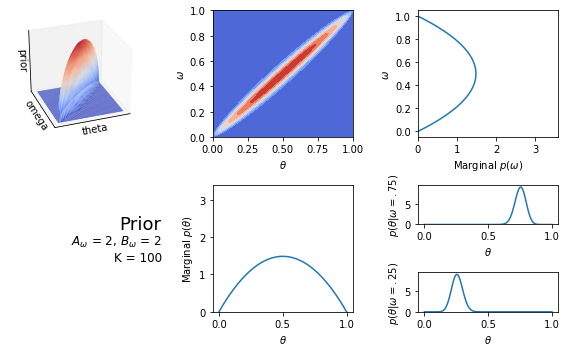

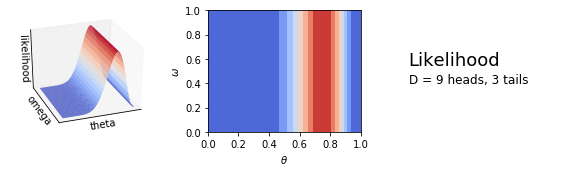

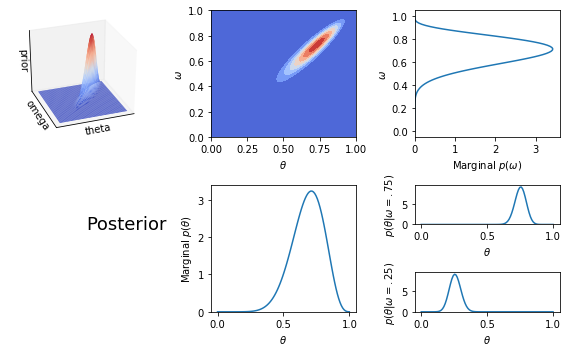

In [6]:
parameters = {
    'a_w': 2,
    'b_w': 2,
    'k': 100,
    'n': 12, 
    'z': 9
}

plot_figure(parameters)

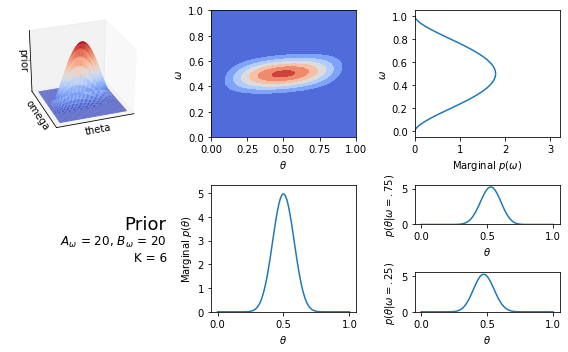

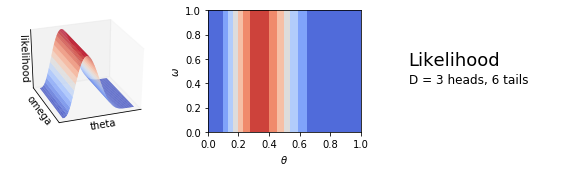

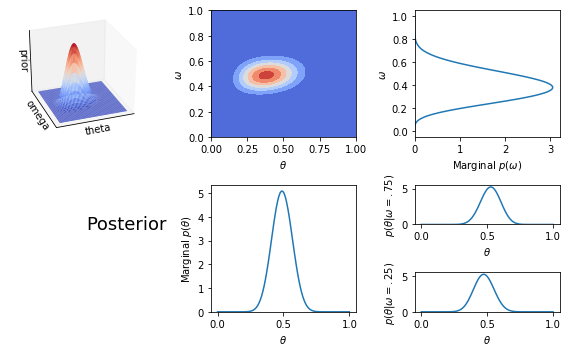

In [7]:
parameters = {
    'a_w': 20,
    'b_w': 20,
    'k': 6,
    'n': 9, 
    'z': 3
}

plot_figure(parameters)